In [4]:
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Input,Dense
from keras.models import Model
import tensorflow as tf
from keras.datasets import mnist
import numpy as np

In [5]:
input_img=Input(shape=(784,))
encoded=Dense(32,activation='relu')(input_img)
decoded=Dense(784,activation='sigmoid')(encoded)
autoencoder=Model(input_img,decoded)
encoder=Model(input_img,encoded)
encoded_input=Input(shape=(32,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))
autoencoder.compile(optimizer=tf.keras.optimizers.Adamax(),loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [6]:
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype("float32")/255.
x_test=x_test.astype("float32")/255.
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_root_mean_squared_error",
    mode="min",
    patience=2,
    verbose=1
)

In [11]:
history=autoencoder.fit(
    x_train,
    x_train,
    epochs=10,
    batch_size=256,
    validation_data=(x_test,x_test),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1239 - root_mean_squared_error: 0.3474 - val_loss: 0.0576 - val_root_mean_squared_error: 0.2400
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0535 - root_mean_squared_error: 0.2313 - val_loss: 0.0429 - val_root_mean_squared_error: 0.2070
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0414 - root_mean_squared_error: 0.2035 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1899
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0352 - root_mean_squared_error: 0.1875 - val_loss: 0.0313 - val_root_mean_squared_error: 0.1769
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0308 - root_mean_squared_error: 0.1755 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1664
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0273 - root_mean_squared_error: 0.1651 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1569
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step 

In [12]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


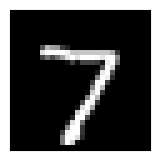

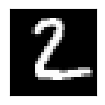

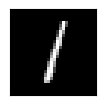

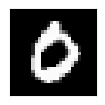

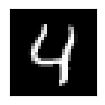

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for i in range(5):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()
    

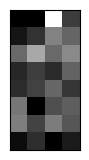

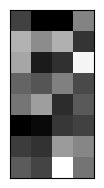

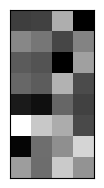

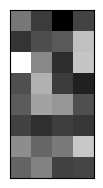

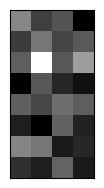

In [14]:
plt.figure(figsize=(20,4))
for i in range(5):
    ax=plt.subplot(2,5,i+1+5)
    encoded_image = encoded_imgs[i]
    plt.imshow(encoded_image.reshape(8,4),cmap='viridis')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

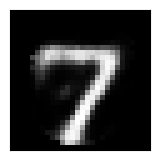

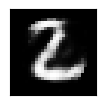

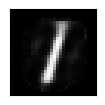

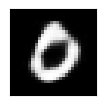

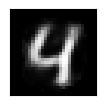

In [15]:
plt.figure(figsize=(20,4))
for i in range(5):
    ax=plt.subplot(2,5,i+1+5)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()